### Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA_vad
import re
# Download
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\garge\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\garge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Reading the data csvs

In [26]:
df_fake = pd.read_csv('C:/Users/garge/canis_hackathon/archive/DataSet_Misinfo_FAKE.csv')
df_true = pd.read_csv('C:/Users/garge/canis_hackathon/archive/DataSet_Misinfo_TRUE.csv')

In [27]:
df_fake.info(), df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43642 entries, 0 to 43641
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  43642 non-null  int64 
 1   text        43642 non-null  object
dtypes: int64(1), object(1)
memory usage: 682.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  34975 non-null  int64 
 1   text        34946 non-null  object
dtypes: int64(1), object(1)
memory usage: 546.6+ KB


(None, None)

In [28]:
df_fake.head()

Unnamed: 0                                               text
0           0  Donald Trump just couldn t wish all Americans ...
1           1  House Intelligence Committee Chairman Devin Nu...
2           2  On Friday, it was revealed that former Milwauk...
3           3  On Christmas day, Donald Trump announced that ...
4           4  Pope Francis used his annual Christmas Day mes...

In [12]:
df_true.head()

Unnamed: 0                                               text
0           0  The head of a conservative Republican faction ...
1           1  Transgender people will be allowed for the fir...
2           2  The special counsel investigation of links bet...
3           3  Trump campaign adviser George Papadopoulos tol...
4           4  President Donald Trump called on the U.S. Post...

[Text(0, 44142, '43642'), Text(1, 35475, '34975')]

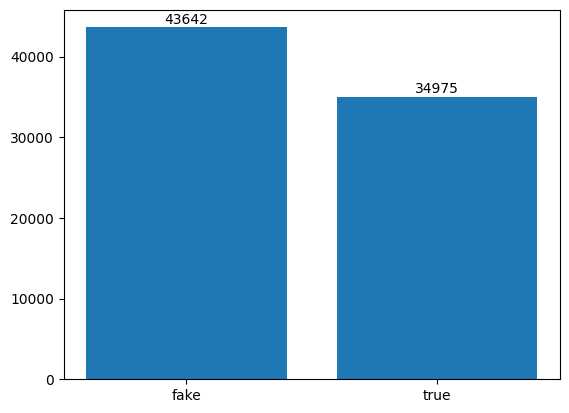

In [29]:
labels=['fake','true']
count=[df_fake.count()[0], df_true.count()[0]]
plt.bar(labels, count)
[plt.text(i, value+500, str(value), ha='center') for i,value in enumerate(count)]

#### Data Cleaning

1. Duplicates

In [30]:
df_fake.value_counts

<bound method DataFrame.value_counts of        Unnamed: 0                                               text
0               0  Donald Trump just couldn t wish all Americans ...
1               1  House Intelligence Committee Chairman Devin Nu...
2               2  On Friday, it was revealed that former Milwauk...
3               3  On Christmas day, Donald Trump announced that ...
4               4  Pope Francis used his annual Christmas Day mes...
...           ...                                                ...
43637       44422  The USA wants to divide Syria.\r\n\r\nGreat Br...
43638       44423  The Ukrainian coup d'etat cost the US nothing ...
43639       44424  The European Parliament falsifies history by d...
43640       44425  The European Parliament falsifies history by d...
43641       44426  A leading FSB officer, Segey Beseda, said duri...

[43642 rows x 2 columns]>

In [31]:
df_true.value_counts

<bound method DataFrame.value_counts of        Unnamed: 0                                               text
0               0  The head of a conservative Republican faction ...
1               1  Transgender people will be allowed for the fir...
2               2  The special counsel investigation of links bet...
3               3  Trump campaign adviser George Papadopoulos tol...
4               4  President Donald Trump called on the U.S. Post...
...           ...                                                ...
34970       34970  Most conservatives who oppose marriage equalit...
34971       34971  The freshman senator from Georgia quoted scrip...
34972       34972  The State Department told the Republican Natio...
34973       34973  ADDIS ABABA, Ethiopia —President Obama convene...
34974       34974  Jeb Bush Is Suddenly Attacking Trump. Here's W...

[34975 rows x 2 columns]>

No duplicates found

2. Missing data

In [32]:
df = df_true[df_true.isnull().any(axis=1)]
len(df)

29

In [33]:
df = df_fake[df_fake.isnull().any(axis=1)]
len(df)

0

In [34]:
df_true=df_true.dropna()
df_fake=df_fake.dropna()

In [35]:
# Adding the Label Column to the data
df_true['label'] = 0
df_true = df_true.drop('Unnamed: 0', axis = 1)

df_fake['label'] = 1
df_fake = df_fake.drop('Unnamed: 0', axis = 1)

# Merging both the dataset
df = pd.concat([df_true, df_fake])

C:\Users\garge\AppData\Local\Temp\ipykernel_18028\719425550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true['label'] = 0


3. Data type

In [36]:
df['text'] = df['text'].astype(str)

4. Remove special characters

In [37]:
df['text'] = [re.sub('\t', '',x) for x in df['text']]
df['text'] = [re.sub('\n', '',x) for x in df['text']]
df['text'] = [re.sub('\r', '',x) for x in df['text']]

5. Remove stop words

In [38]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Post Data cleaning count

[Text(0, 44142, '43642'), Text(1, 35446, '34946')]

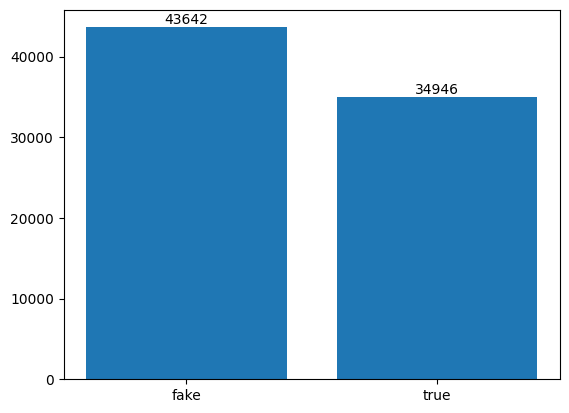

In [39]:
labels=['fake','true']
count=[df_fake.count()[0], df_true.count()[0]]
plt.bar(labels, count)
[plt.text(i, value+500, str(value), ha='center') for i,value in enumerate(count)]

#### Sentimental Analysis of the all the text

In [40]:
sid = SIA_vad()

In [41]:
def vader_compound(text):
    scores = sid.polarity_scores(text)
    compound = scores['compound']
    return compound

In [42]:
df['vader_score'] = df['text'].apply(lambda x : vader_compound(x))

#### Calculating the mean vader score for fake and true news

In [46]:
new_df2 = df[['label', 'vader_score']]
grouped_df2 = new_df2.groupby('label').mean().reset_index()

In [47]:
grouped_df2.head()

label  vader_score
0      0     0.097805
1      1    -0.078427

In [48]:
df['sentiment'] = np.where(df['vader_score'] > 0,1,0)

Clustering

TF-IDF Vectorization

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

df = pd.read_csv('data_feature.csv')

text_data = df['text'].values.tolist()
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data) #feature matrix


KMeans clustering

100%|██████████| 19/19 [07:16<00:00, 22.99s/it]


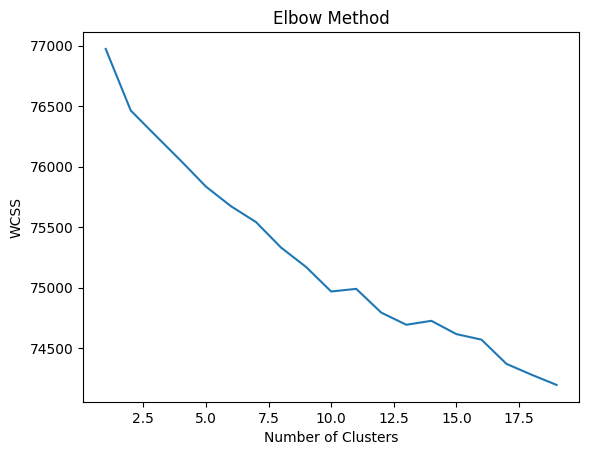

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load the text data
df = pd.read_csv('data_feature.csv')

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

# Apply k-means clustering with a range of cluster numbers
wcss = []
for i in tqdm(range(1, 20)):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=1, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


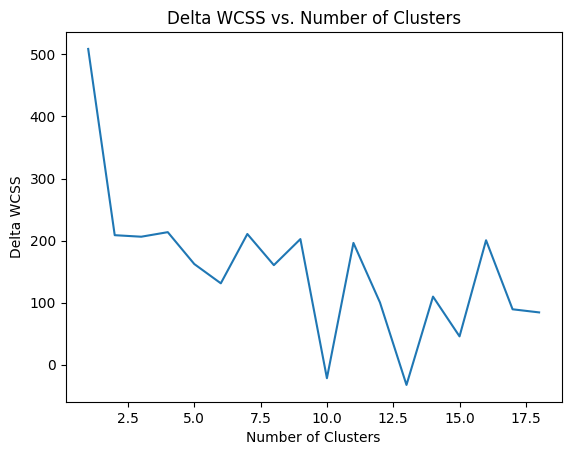

Elbow point is at 2 clusters.


In [5]:
delta = [wcss[i] - wcss[i+1] for i in range(len(wcss)-1)]
plt.plot(range(1, len(delta) + 1), delta)
plt.title('Delta WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Delta WCSS')
plt.show()

elbow_point = delta.index(max(delta)) + 2
print("Elbow point is at", elbow_point, "clusters.")

In [6]:
k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

labels = kmeans.labels_
df['cluster'] = labels

C:\Users\garge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
df_clustered = df.groupby('cluster')

In [8]:
df_clustered.size()


cluster
0    21761
1    56827
dtype: int64

In [10]:
cluster_count = df.groupby(['cluster', 'label']).size().reset_index(name='count')

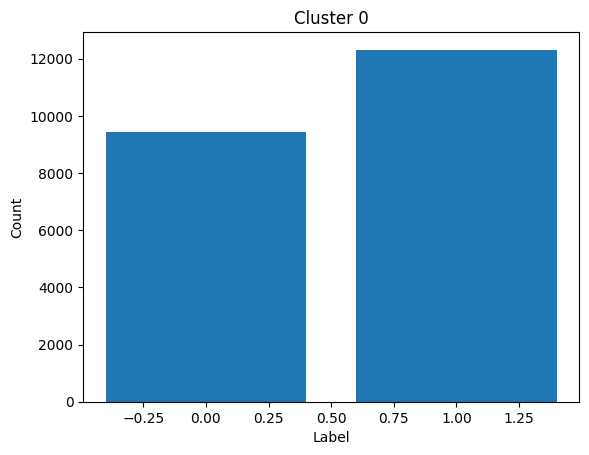

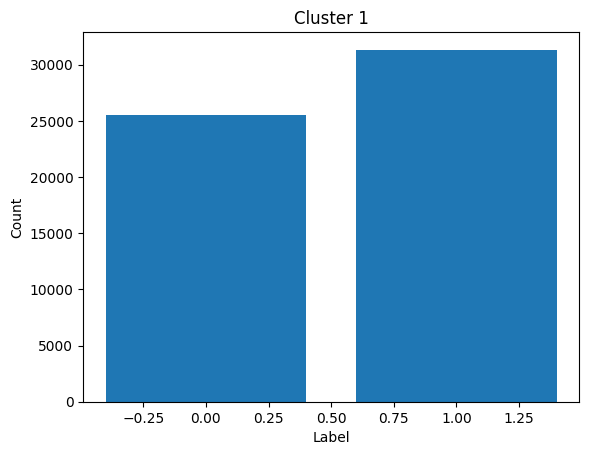

In [11]:
for cluster in cluster_count['cluster'].unique():
    fig, ax = plt.subplots()
    data = cluster_count[cluster_count['cluster'] == cluster]
    ax.bar(data['label'], data['count'])
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    ax.set_title('Cluster ' + str(cluster))
    plt.show()

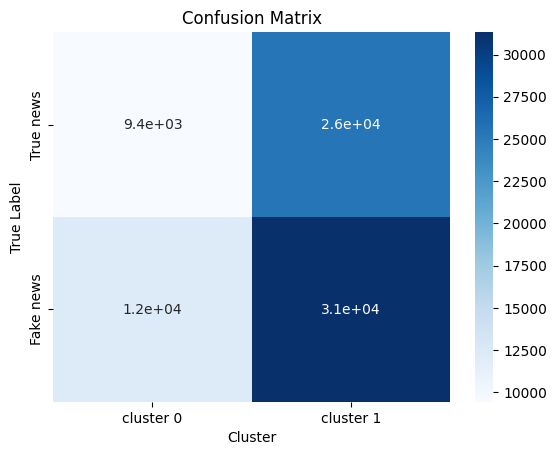

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(df['label'], df['cluster'])

# create a dataframe from the confusion matrix
df_cm = pd.DataFrame(cm, index=['True news', 'Fake news'], columns=['cluster 0', 'cluster 1'])

# create the heatmap using Seaborn
sns.heatmap(df_cm, annot=True, cmap='Blues')

# add labels and title
plt.xlabel('Cluster')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# display the plot
plt.show()

0


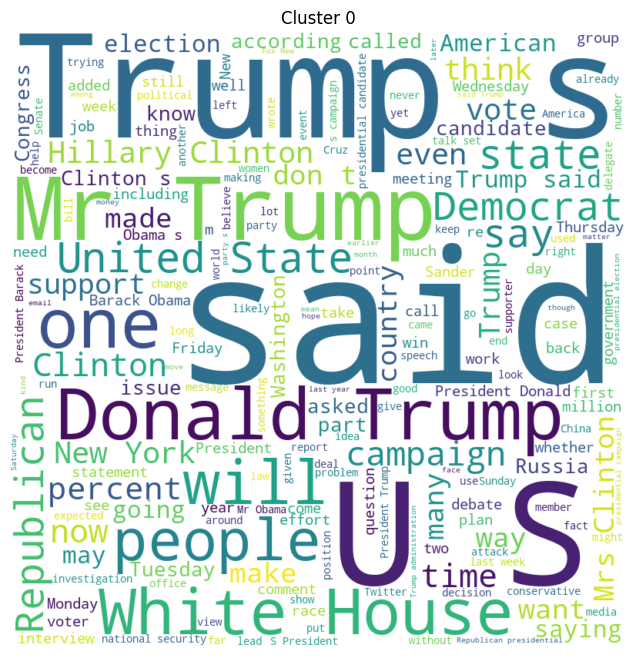

1


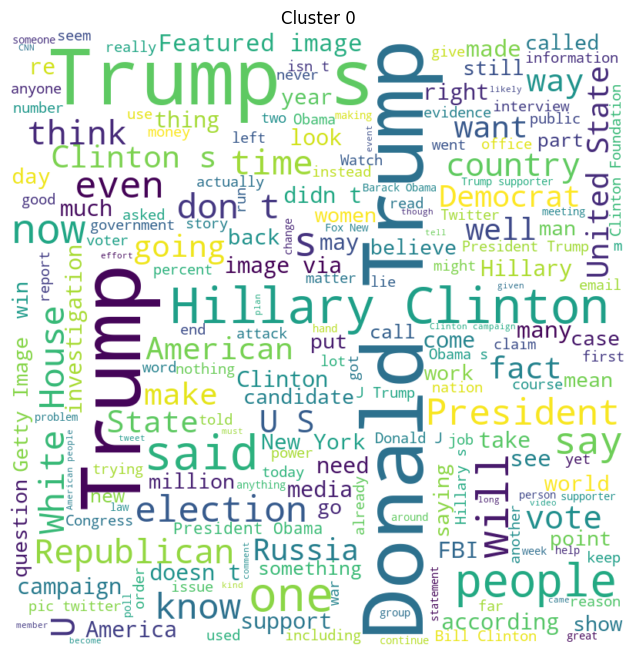

0


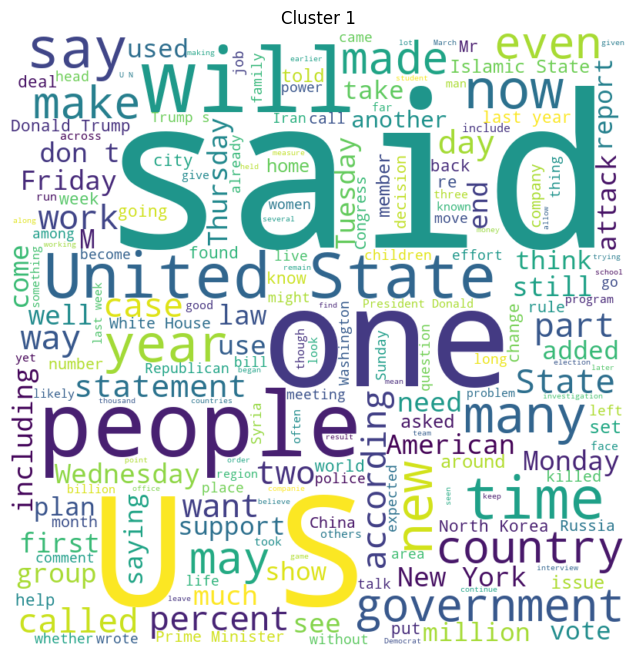

1


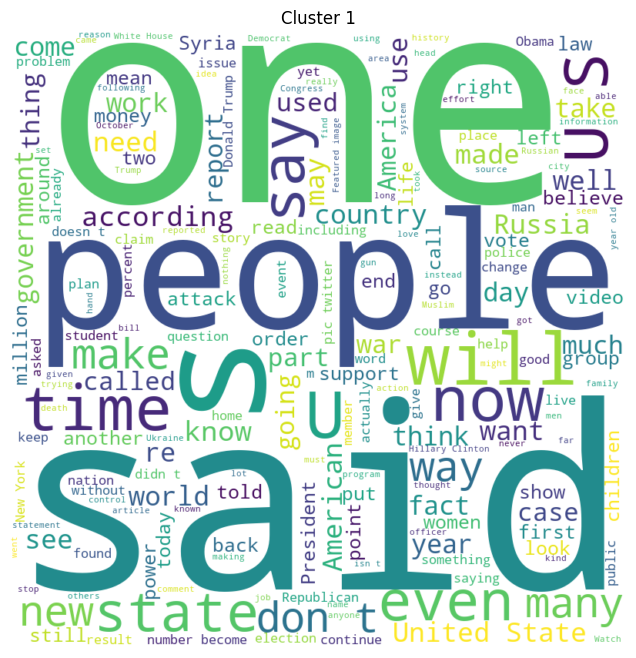

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

groups = df.groupby(['cluster','label'])

# Generate a word cloud for each cluster
for (cluster,label), group in groups:
    # Concatenate the text for all documents in the cluster
    text = ' '.join(group['text'])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    print(label)
    plt.title('Cluster {}'.format(cluster,label))
    plt.show()

In [20]:
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

labels = kmeans.labels_
df['cluster'] = labels

C:\Users\garge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


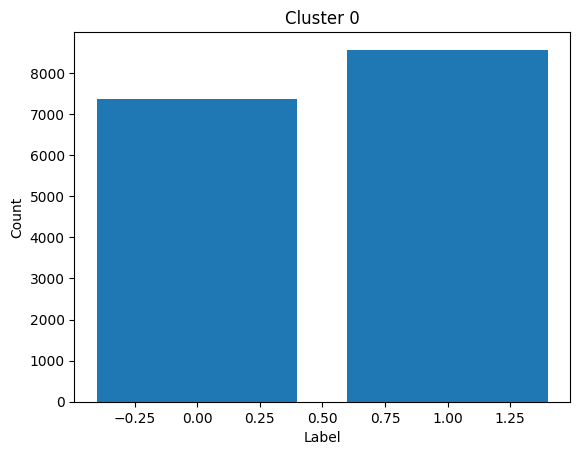

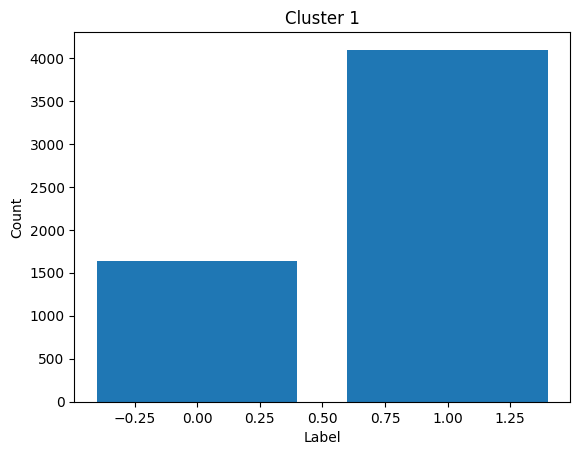

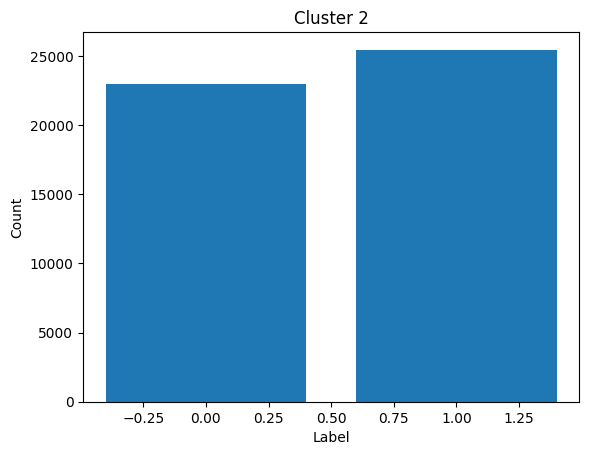

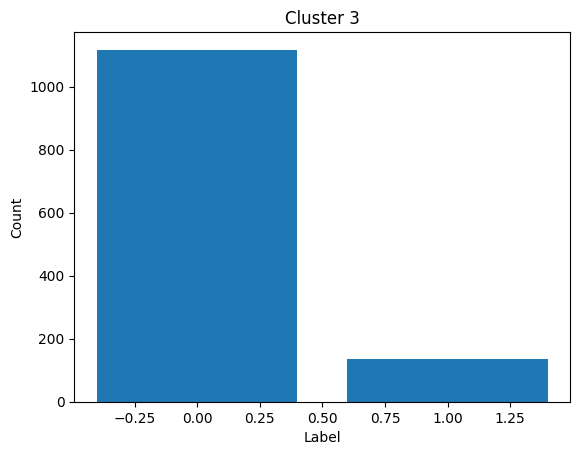

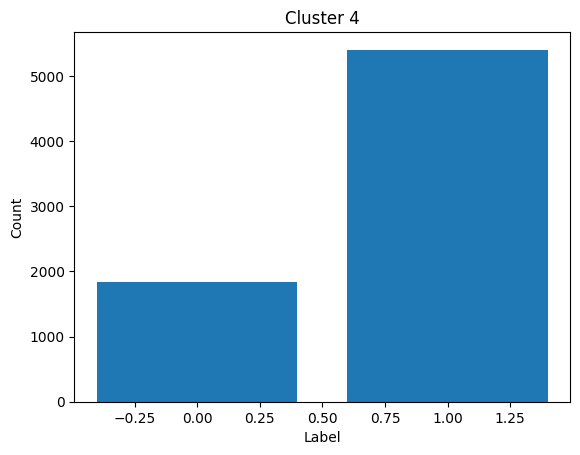

In [21]:
cluster_count = df.groupby(['cluster', 'label']).size().reset_index(name='count')

for cluster in cluster_count['cluster'].unique():
    fig, ax = plt.subplots()
    data = cluster_count[cluster_count['cluster'] == cluster]
    ax.bar(data['label'], data['count'])
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    ax.set_title('Cluster ' + str(cluster))
    plt.show()

0


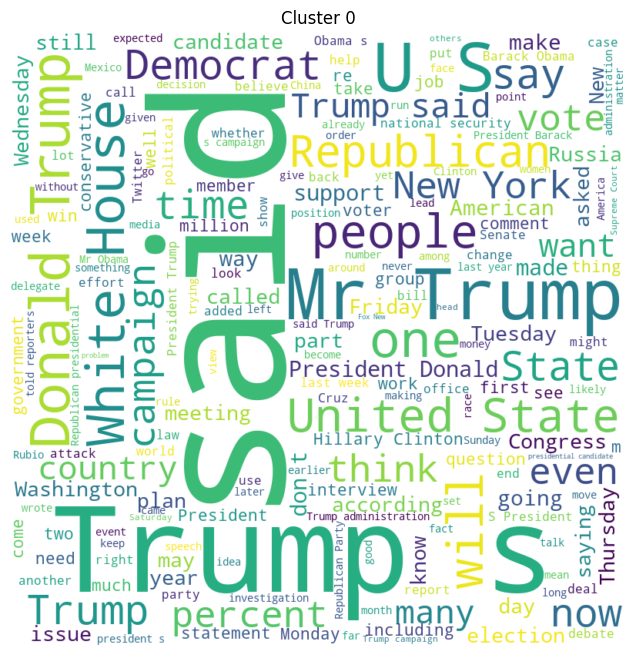

1


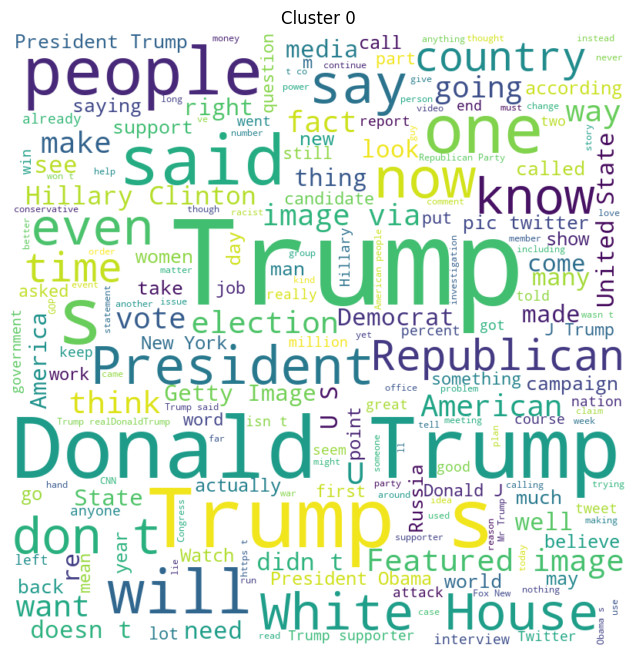

0


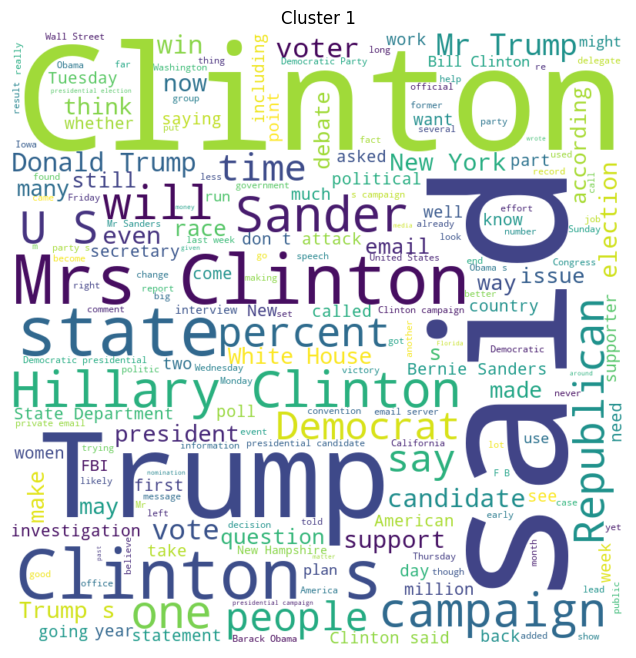

1


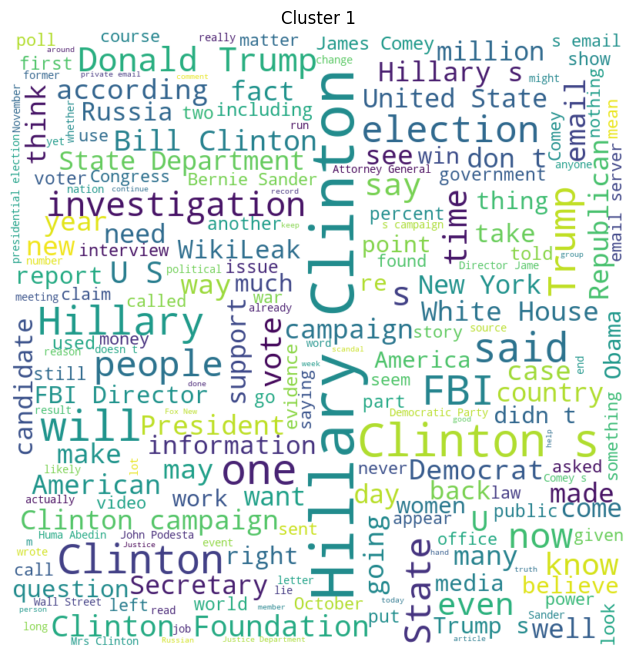

0


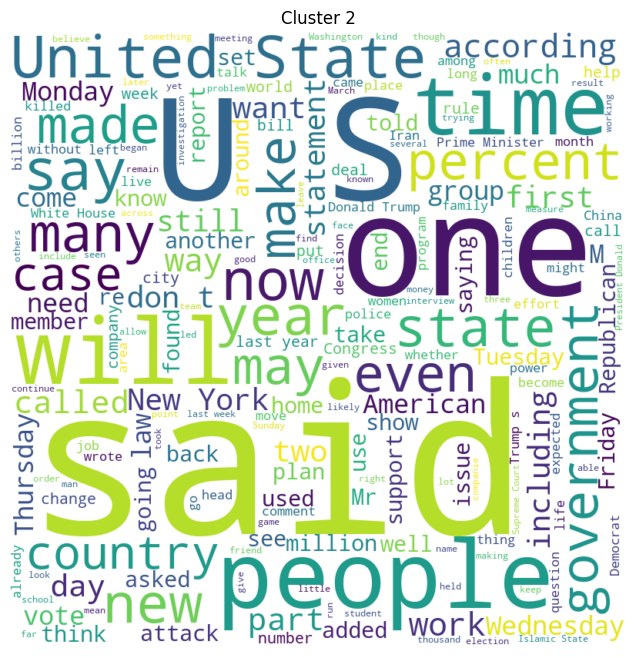

1


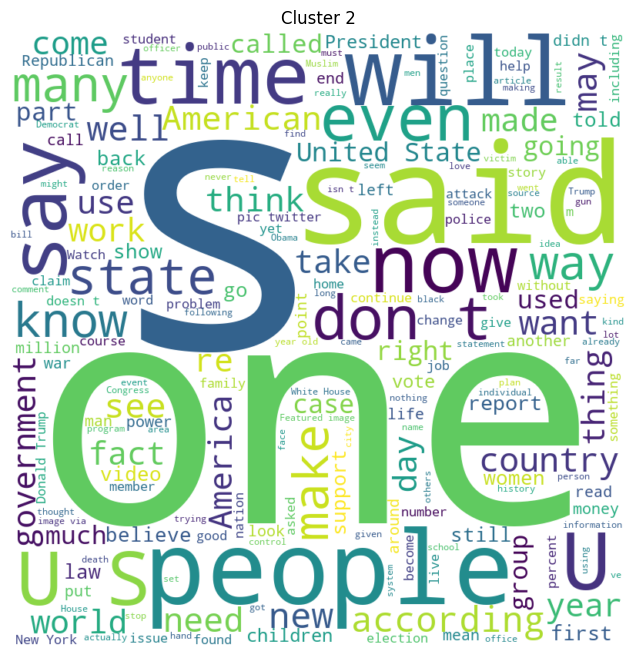

0


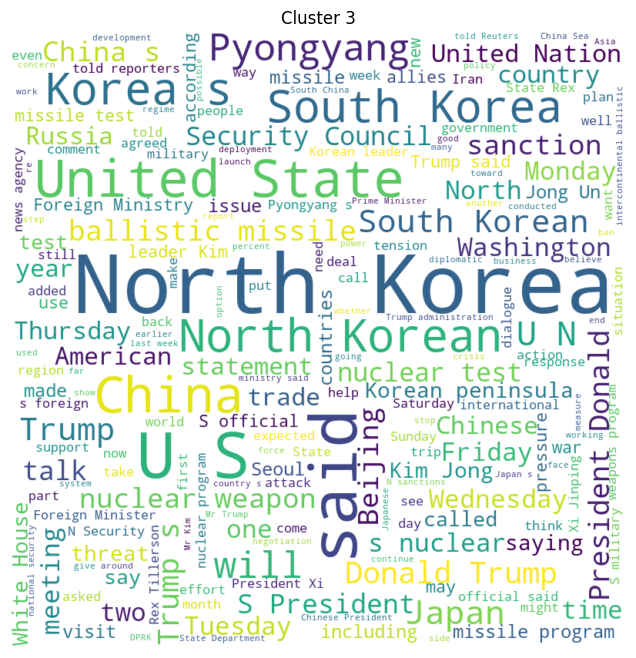

1


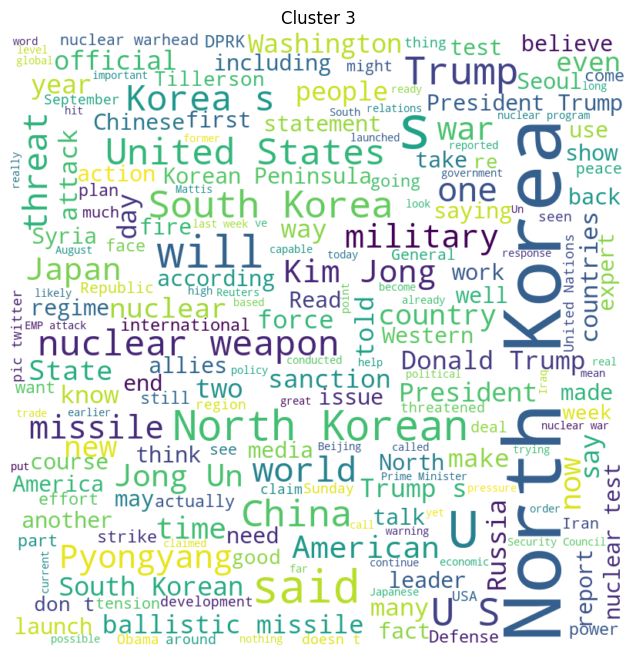

0


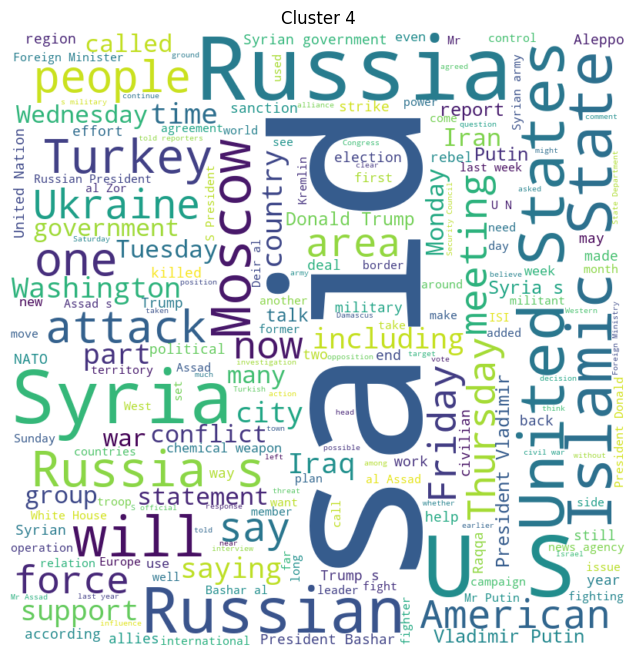

1


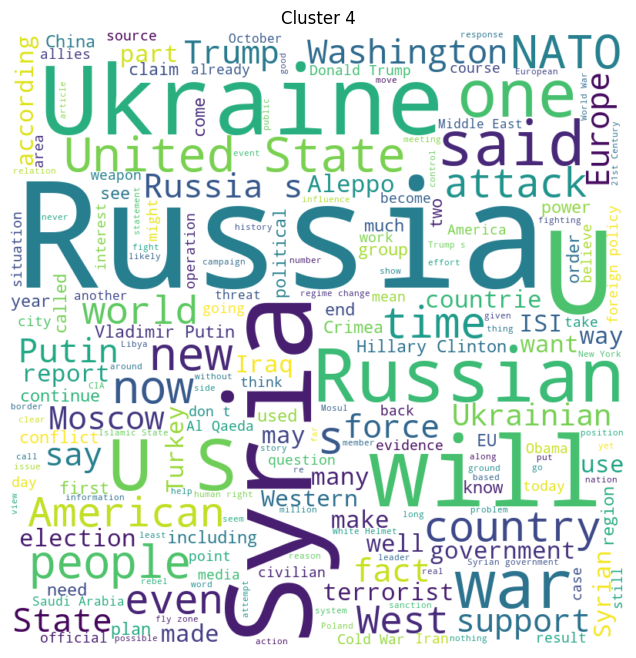

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

groups = df.groupby(['cluster','label'])

# Generate a word cloud for each cluster
for (cluster,label), group in groups:
    # Concatenate the text for all documents in the cluster
    text = ' '.join(group['text'])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    print(label)
    plt.title('Cluster {}'.format(cluster,label))
    plt.show()

News length

Number of sentences in news

In [64]:
import nltk
nltk.download('punkt')  #tokenizer data

df['no_of_sentences_original_news'] = df['text'].apply(lambda x: len(nltk.tokenize.sent_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\garge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average number of words in each sentence

In [66]:
sentences = [nltk.sent_tokenize(text) for text in df["text"]]
words = [[nltk.word_tokenize(sentence) for sentence in text] for text in sentences]

word_count = [[len(sentence) for sentence in text] for text in words]

avg_word_count = [sum(text)/len(text) for text in word_count]

df["avg_word_count_sentencewise_original"] = avg_word_count


                                                text  label  \
0  The head of a conservative Republican faction ...      0   
1  Transgender people will be allowed for the fir...      0   
2  The special counsel investigation of links bet...      0   
3  Trump campaign adviser George Papadopoulos tol...      0   
4  President Donald Trump called on the U.S. Post...      0   

                              text_without_stopwords  vader_score  sentiment  \
0  head conservative Republican faction U.S. Cong...       0.9857          1   
1  Transgender people allowed first time enlist U...       0.9488          1   
2  special counsel investigation links Russia Pre...      -0.6808          0   
3  Trump campaign adviser George Papadopoulos tol...      -0.2201          0   
4  President Donald Trump called U.S. Postal Serv...       0.5896          1   

   cluster  original_news_length  nostopwords_news_length  \
0        1                    30                       29   
1        0        

Total word count

In [ ]:
words = [nltk.word_tokenize(text) for text in df["text"]]
word_count = [len(text) for text in words]
df["word_count_nostopwords"] = word_count
print(df.head())

In [72]:
df = df.drop('nostopwords_news_length',axis=1)
df =  df.drop('original_news_length',axis=1)

In [75]:
df.to_csv('data_feature.csv',index=False)

PCA

In [9]:
import pandas as pd
df = pd.read_csv('data_feature.csv')

In [11]:
"""
from sklearn.decomposition import PCA

# Assuming you have already obtained the cluster labels using KMeans
pca = PCA(n_components=2)
labels = df['cluster'].values
X_pca = pca.fit_transform(X.toarray())

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
"""


"\nfrom sklearn.decomposition import PCA\n\n# Assuming you have already obtained the cluster labels using KMeans\npca = PCA(n_components=2)\nlabels = df['cluster'].values\nX_pca = pca.fit_transform(X.toarray())\n\nplt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')\nplt.xlabel('PC1')\nplt.ylabel('PC2')\nplt.show()\n"

In [23]:
df.gr


text                                    Guatemala s Supreme Court said on Wednesday it...
label                                                                                   0
text_without_stopwords                  Guatemala Supreme Court said Wednesday would i...
vader_score                                                                         0.975
sentiment                                                                               1
cluster                                                                                 0
no_of_sentences_original_news                                                          14
avg_word_count_sentencewise_original                                            25.428571
word_count_nostopwords                                                                356
Name: 17680, dtype: object

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X.toarray())

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df['cluster'])
plt.show()

MemoryError: Unable to allocate 142. GiB for an array with shape (78588, 242201) and data type float64

NER

In [37]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

import spacy
from tqdm import tqdm
tqdm.pandas()

nlp = spacy.load('en_core_web_sm')

def ner(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df['entities'] = df['text_without_stopwords'].progress_apply(ner)


100%|██████████| 78588/78588 [1:05:51<00:00, 19.89it/s]  


In [38]:
df

text  label  \
0      The head of a conservative Republican faction ...      0   
1      Transgender people will be allowed for the fir...      0   
2      The special counsel investigation of links bet...      0   
3      Trump campaign adviser George Papadopoulos tol...      0   
4      President Donald Trump called on the U.S. Post...      0   
...                                                  ...    ...   
78583  The USA wants to divide Syria.Great Britain, F...      1   
78584  The Ukrainian coup d'etat cost the US nothing ...      1   
78585  The European Parliament falsifies history by d...      1   
78586  The European Parliament falsifies history by d...      1   
78587  A leading FSB officer, Segey Beseda, said duri...      1   

                                  text_without_stopwords  vader_score  \
0      head conservative Republican faction U.S. Cong...       0.9857   
1      Transgender people allowed first time enlist U...       0.9488   
2      special counsel investigation links Russia Pre...      -0.6808   
3      Trump campaign adviser George Papadopoulos tol...      -0.2201   
4      President Donald Trump called U.S. Postal Serv...       0.5896   
...                                                  ...          ...   
78583  USA wants divide Syria.Great Britain, France, ...       0.3612   
78584  Ukrainian coup d'etat cost US nothing nearly n...      -0.6492   
78585  European Parliament falsifies history declarin...      -0.9074   
78586  European Parliament falsifies history declarin...      -0.9074   
78587  leading FSB officer, Segey Beseda, said summit...       0.2732   

       sentiment  cluster  no_of_sentences_original_news  \
0              1        0                             30   
1              1        2                             13   
2              0        0                             17   
3              0        0                             16   
4              1        2                             40   
...          ...      ...                            ...   
78583          1        4                              2   
78584          0        4                              5   
78585          0        2                              5   
78586          0        2                              5   
78587          1        2                              2   

       avg_word_count_sentencewise_original  word_count_nostopwords  \
0                                 29.333333                     880   
1                                 34.615385                     450   
2                                 30.470588                     518   
3                                 27.000000                     432   
4                                 24.550000                     982   
...                                     ...                     ...   
78583                             41.000000                      82   
78584                             23.400000                     117   
78585                             27.600000                     138   
78586                             27.600000                     138   
78587                             30.500000                      61   

                                              pos_counts  \
0      {'DT': 69, 'NN': 122, 'IN': 94, 'JJ': 64, 'NNP...   
1      {'NN': 60, 'NNS': 25, 'MD': 9, 'VB': 26, 'VBN'...   
2      {'DT': 48, 'JJ': 27, 'NN': 72, 'IN': 64, 'NNS'...   
3      {'NNP': 81, 'NN': 52, 'VBD': 31, 'DT': 37, 'JJ...   
4      {'NNP': 122, 'VBD': 27, 'IN': 111, 'DT': 86, '...   
...                                                  ...   
78583  {'DT': 14, 'NNP': 12, 'VBZ': 1, 'TO': 4, 'VB':...   
78584  {'DT': 11, 'JJ': 11, 'NN': 20, 'NNP': 21, 'CC'...   
78585  {'DT': 14, 'NNP': 10, 'NNS': 12, 'NN': 18, 'IN...   
78586  {'DT': 14, 'NNP': 10, 'NNS': 12, 'NN': 18, 'IN...   
78587  {'DT': 8, 'JJ': 1, 'NNP': 15, 'NN': 7, ',': 2,...   

                                      dependency_parsing  fk_grade_level  \

POS Count

In [29]:
import nltk
from collections import Counter
from tqdm import tqdm

#nltk.download('averaged_perceptron_tagger')

def count_pos(sentence):
    words = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(words)
    tag_counts = Counter(tag for word, tag in pos_tags)
    return tag_counts

tqdm.pandas()

df['pos_counts'] = df['text'].progress_apply(count_pos)

total_counts = Counter(tag for tag_counts in df['pos_counts'] for tag in tag_counts.keys())


100%|██████████| 78588/78588 [21:57<00:00, 59.65it/s]  


Dependency Parsing

In [31]:
import spacy

nlp = spacy.load("en_core_web_sm")

tqdm.pandas()

def parse_sentence(sentence):
    doc = nlp(sentence)
    return [(token.text, token.dep_, token.head.text) for token in doc]

df['dependency_parsing'] = df['text'].progress_apply(parse_sentence)

100%|██████████| 78588/78588 [1:43:28<00:00, 12.66it/s]   


Flesch-Kincaid Readability Grade Level

In [33]:
!pip install textstat

     -------------------------------------- 105.1/105.1 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 5.7 MB/s eta 0:00:00


In [34]:
import textstat
from tqdm import tqdm

tqdm.pandas()
def calculate_fk_grade_level(sentence):
    return textstat.flesch_kincaid_grade(sentence)
df['fk_grade_level'] = df['text'].progress_apply(calculate_fk_grade_level)

100%|██████████| 78588/78588 [03:43<00:00, 351.98it/s]  


In [35]:
df

text  label  \
0      The head of a conservative Republican faction ...      0   
1      Transgender people will be allowed for the fir...      0   
2      The special counsel investigation of links bet...      0   
3      Trump campaign adviser George Papadopoulos tol...      0   
4      President Donald Trump called on the U.S. Post...      0   
...                                                  ...    ...   
78583  The USA wants to divide Syria.Great Britain, F...      1   
78584  The Ukrainian coup d'etat cost the US nothing ...      1   
78585  The European Parliament falsifies history by d...      1   
78586  The European Parliament falsifies history by d...      1   
78587  A leading FSB officer, Segey Beseda, said duri...      1   

                                  text_without_stopwords  vader_score  \
0      head conservative Republican faction U.S. Cong...       0.9857   
1      Transgender people allowed first time enlist U...       0.9488   
2      special counsel investigation links Russia Pre...      -0.6808   
3      Trump campaign adviser George Papadopoulos tol...      -0.2201   
4      President Donald Trump called U.S. Postal Serv...       0.5896   
...                                                  ...          ...   
78583  USA wants divide Syria.Great Britain, France, ...       0.3612   
78584  Ukrainian coup d'etat cost US nothing nearly n...      -0.6492   
78585  European Parliament falsifies history declarin...      -0.9074   
78586  European Parliament falsifies history declarin...      -0.9074   
78587  leading FSB officer, Segey Beseda, said summit...       0.2732   

       sentiment  cluster  no_of_sentences_original_news  \
0              1        0                             30   
1              1        2                             13   
2              0        0                             17   
3              0        0                             16   
4              1        2                             40   
...          ...      ...                            ...   
78583          1        4                              2   
78584          0        4                              5   
78585          0        2                              5   
78586          0        2                              5   
78587          1        2                              2   

       avg_word_count_sentencewise_original  word_count_nostopwords  \
0                                 29.333333                     880   
1                                 34.615385                     450   
2                                 30.470588                     518   
3                                 27.000000                     432   
4                                 24.550000                     982   
...                                     ...                     ...   
78583                             41.000000                      82   
78584                             23.400000                     117   
78585                             27.600000                     138   
78586                             27.600000                     138   
78587                             30.500000                      61   

                                              pos_counts  \
0      {'DT': 69, 'NN': 122, 'IN': 94, 'JJ': 64, 'NNP...   
1      {'NN': 60, 'NNS': 25, 'MD': 9, 'VB': 26, 'VBN'...   
2      {'DT': 48, 'JJ': 27, 'NN': 72, 'IN': 64, 'NNS'...   
3      {'NNP': 81, 'NN': 52, 'VBD': 31, 'DT': 37, 'JJ...   
4      {'NNP': 122, 'VBD': 27, 'IN': 111, 'DT': 86, '...   
...                                                  ...   
78583  {'DT': 14, 'NNP': 12, 'VBZ': 1, 'TO': 4, 'VB':...   
78584  {'DT': 11, 'JJ': 11, 'NN': 20, 'NNP': 21, 'CC'...   
78585  {'DT': 14, 'NNP': 10, 'NNS': 12, 'NN': 18, 'IN...   
78586  {'DT': 14, 'NNP': 10, 'NNS': 12, 'NN': 18, 'IN...   
78587  {'DT': 8, 'JJ': 1, 'NNP': 15, 'NN': 7, ',': 2,...   

                                      dependency_parsing  fk_grade_level  


In [39]:
df.to_csv('data_feature.csv',index=False)